# Project Start - EDA

## Examining the project topic by loading the dataset from Kaggle

## Import necessary libraries and load the dataset

Summary — Clean EDA Checklist
Category	 What to Check
Structure	 Data types, size, columns
Quality	     Missing, duplicates
Values	     Outliers & impossible values
Univariate	 Distribution
Bivariate	 Relationship to target
Categorical	 Balance & uniqueness
Correlation	 Redundancy & insights



In [2]:
import numpy as np    # linear algebra 
import pandas as pd    # Data processing, Input & Output load    
import matplotlib.pyplot as plt    # Visualization & plotting
import seaborn as sns  # visaulization
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('../Data/raw-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [44]:
df.rename(columns={'Residence_type':'residence_type'}, inplace= True)
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [45]:
#checking the summary statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [46]:
#checking shape and data types
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [48]:
#Examining missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

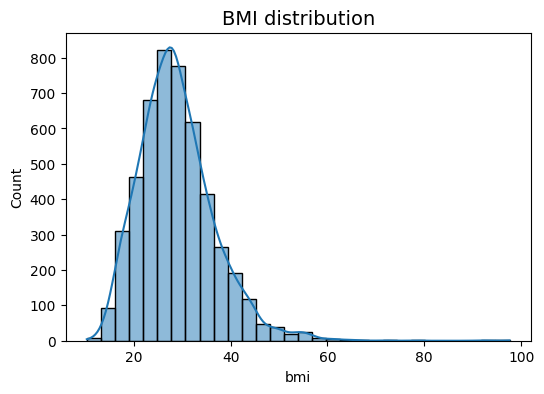

In [5]:
#There is only one column with missing values - bmi. Lets check the distribution of the bmi column before deciding how to handle the missing values.
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('BMI distribution',fontsize=14)
plt.savefig('../Images/bmi_distribution.png',bbox_inches='tight', dpi=300, facecolor = 'white')

In [50]:
#checking the categorical column for unique values
cat_cols = df.select_dtypes(include=['object']).nunique()
cat_cols


gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [51]:
count = df['stroke'].value_counts()
percentages = df['stroke'].value_counts(normalize=True) * 100
split = pd.DataFrame({'Count': count, 'Percentage': percentages})
split

,Count,Percentage
stroke,,
0,4861,95.127202
1,249,4.872798


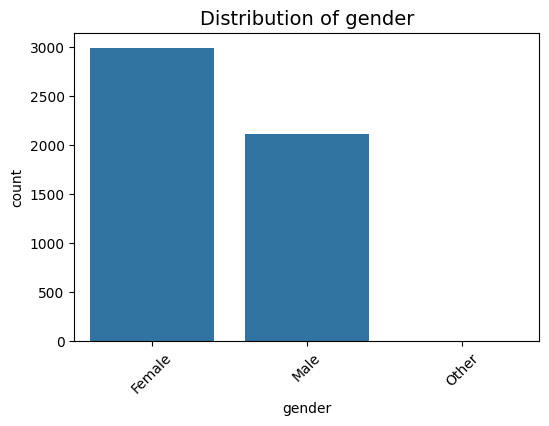

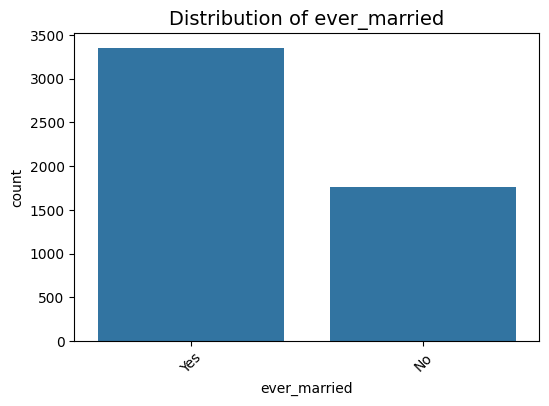

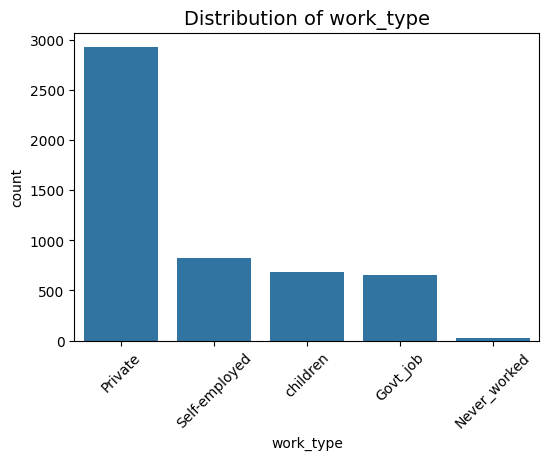

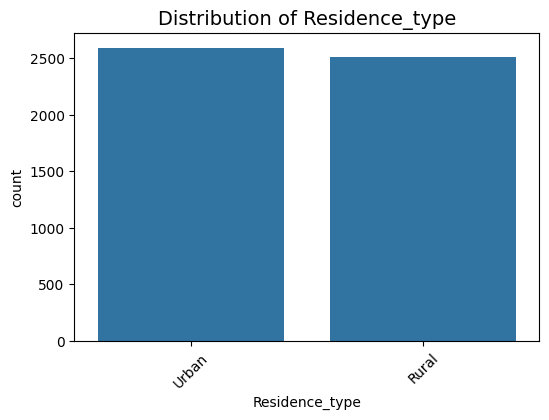

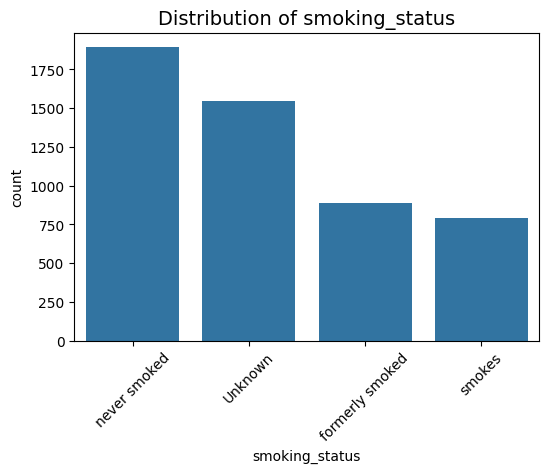

In [7]:
#Examining categorical columns
df[df.select_dtypes(include=['object']).columns].nunique()
categorical_values = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_values:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(f'../Images/{col}_distribution.png',bbox_inches='tight', dpi=300, facecolor = 'white')
    plt.show()

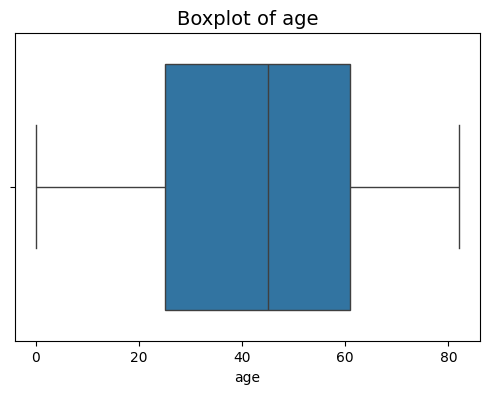

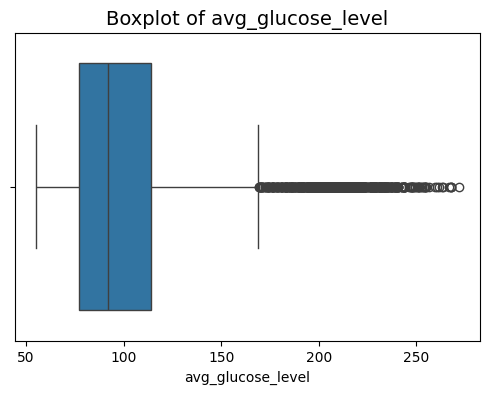

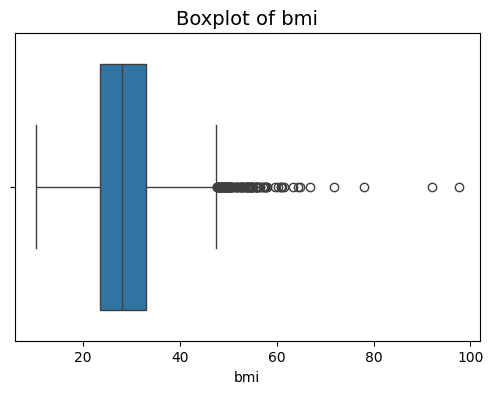

In [8]:
#outliers and impossible values in numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for col in numerical_cols:
    if col in ['id', 'stroke', 'hypertension', 'heart_disease']:
        continue
    # skip columns that are entirely NaN
    elif df[col].isnull().all():
        continue
    else:
        plt.figure(figsize=(6,4))
        # drop NaNs so plotting functions don't error or distort the plot
        sns.boxplot(x=df[col].dropna())
        plt.title(f'Boxplot of {col}', fontsize=14)
        plt.savefig(f'../Images/{col}_boxplot.png',bbox_inches='tight', dpi=300, facecolor = 'white')
        plt.show()

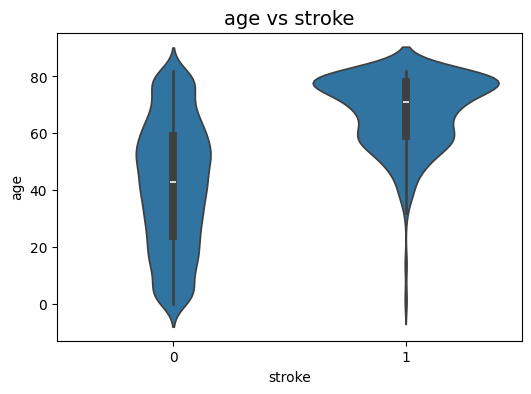

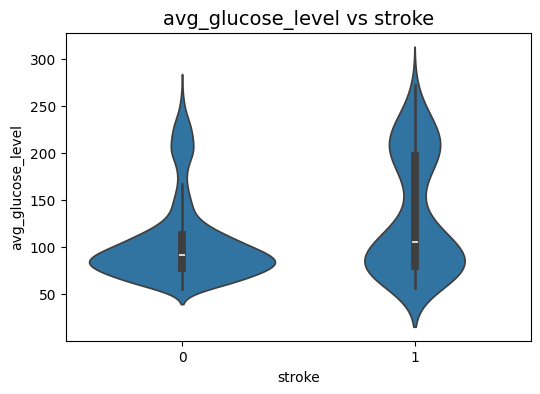

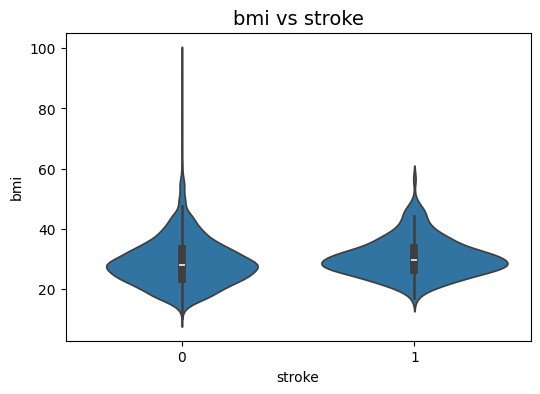

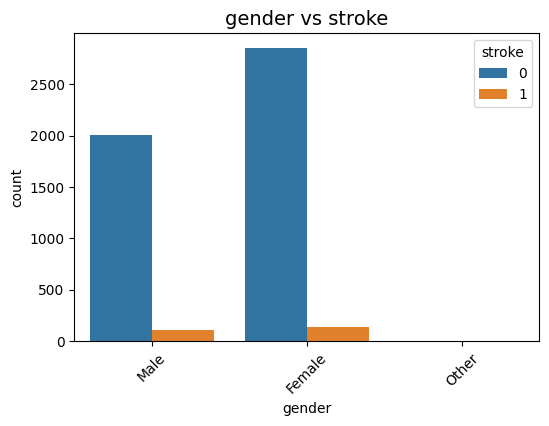

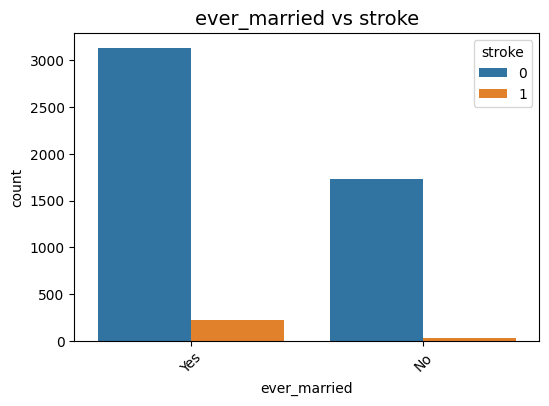

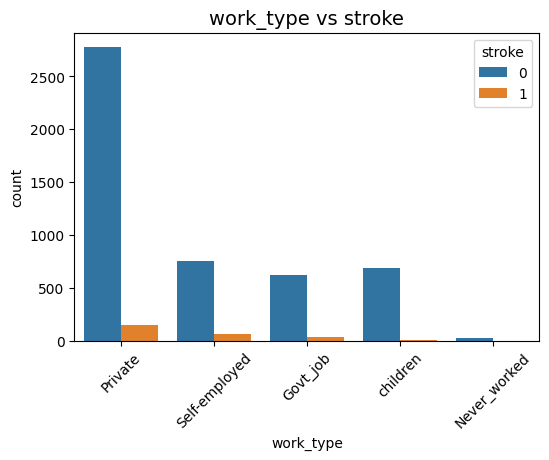

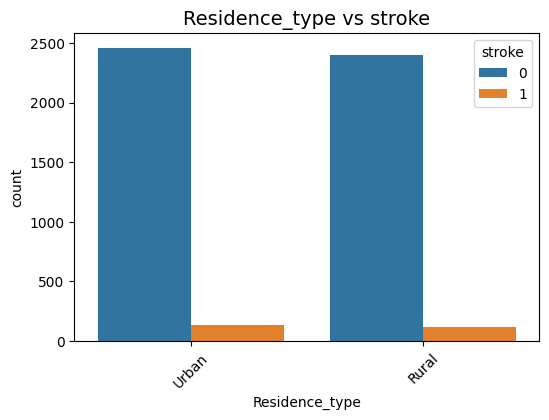

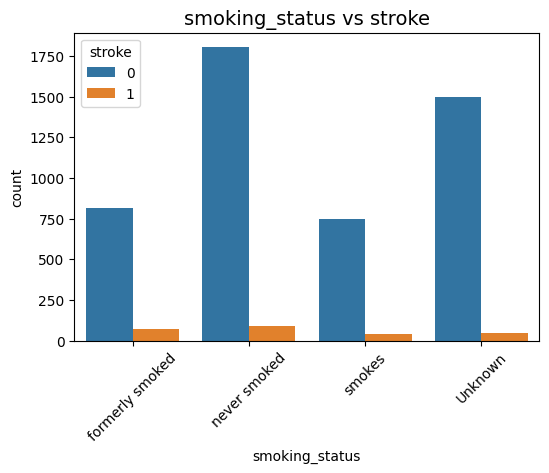

In [ ]:
# bivariate analysis with respect to target variable 'stroke'
target = df['stroke']
for col in numerical_cols:
    if col in ['id', 'stroke', 'hypertension', 'heart_disease']:
        continue
    else:
        plt.figure(figsize=(6,4))
        sns.violinplot(x=target, y=df[col])
        plt.title(f'{col} vs stroke', fontsize=14)
        plt.savefig(f'../Images/{col}_stroke_violinplot.png',bbox_inches='tight', dpi=300, facecolor = 'white')
        plt.show()

# categorical columns vs target variable 'stroke'
for col in categorical_values:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f'{col} vs stroke', fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(f'../Images/{col}_stroke_violinplot.png',bbox_inches='tight', dpi=300, facecolor = 'white')
    plt.show()


In [1]:
#Pairplot for numerical features colored by stroke
plt.figure(figsize=(10,8))
sns.pairplot(df, vars=['bmi', 'avg_glucose_level', 'age'], hue='stroke')
plt.suptitle('Pairplot of Numerical Features Colored by Stroke', y=1.02)
plt.tight_layout()
plt.savefig('../Images/pairplot_numerical.png',bbox_inches='tight', dpi=300, facecolor = 'white')
plt.show()


NameError: name 'plt' is not defined

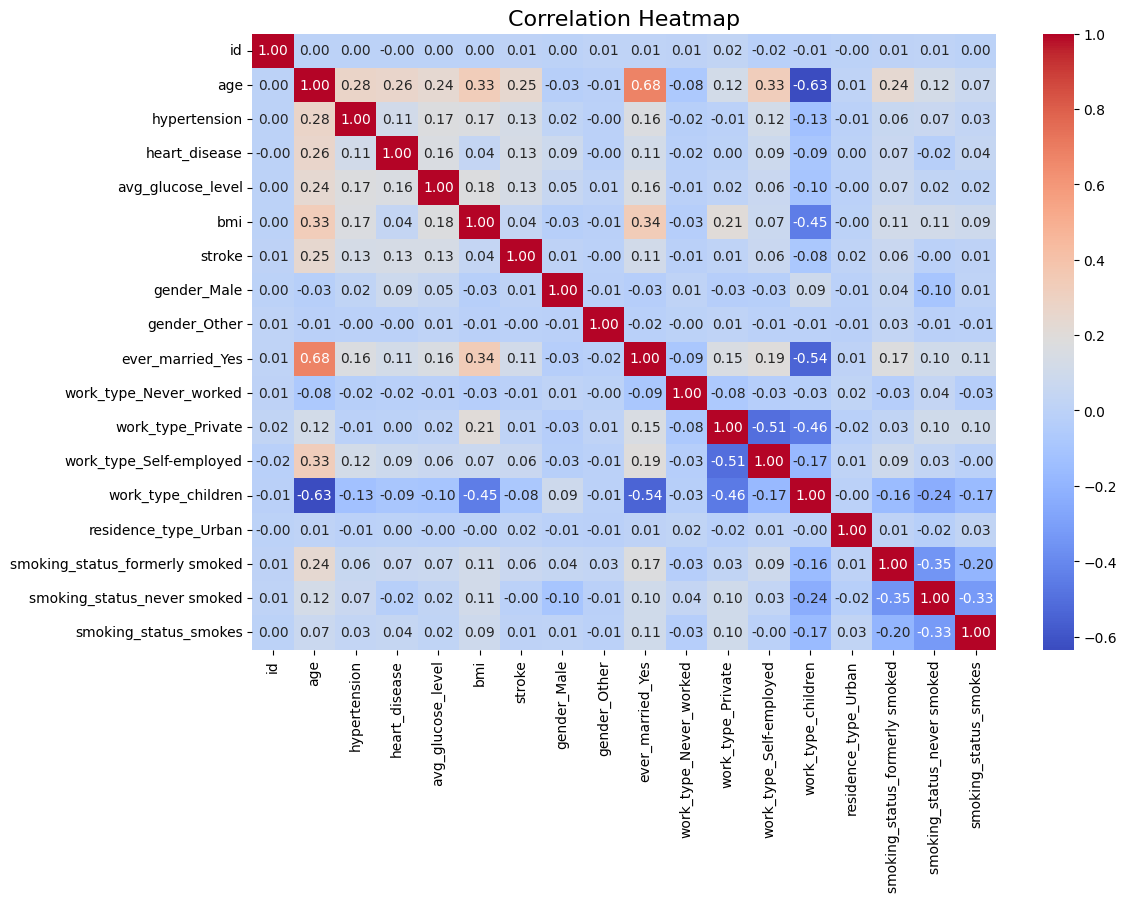

In [56]:
#one hot encoding for categorical values since there are some that are not binary. Then I will plot a heatmap.

df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



In [57]:
# Using PointBiserial Correlation for numerical and binary categorical variables
from scipy.stats import pointbiserialr
for col in numerical_cols:
    if col in ['id', 'stroke', 'hypertension', 'heart_disease']:
        continue
    corr, p_value = pointbiserialr(df[col].dropna(), df['stroke'].loc[df[col].dropna().index])
    print(f'Point Biserial Correlation between {col} and stroke: {corr:.4f}, p-value: {p_value:.4f}')


    

Point Biserial Correlation between age and stroke: 0.2453, p-value: 0.0000
Point Biserial Correlation between avg_glucose_level and stroke: 0.1319, p-value: 0.0000
Point Biserial Correlation between bmi and stroke: 0.0424, p-value: 0.0030


In [59]:
#saving df to parquet file
df = df.to_parquet('../Data/processed_stroke_data.parquet', index=False)